In [1]:
import pandas as pd                                                             
import numpy as np                                                              
import xray                                                                     
import matplotlib.pyplot as plt   
%matplotlib inline
                                                                                
from matplotlib import rc                                                       
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})                                      
rc('text', usetex=True)                                                         

In [17]:
cast_df = pd.read_table('./Cast1.dat', index_col=0)                             
PAR = xray.DataArray(cast_df['PAR'])  

# Determine the euphotic zone depth                                             
z_eu = float(PAR[PAR <= (PAR.sel(Depth=0) / 1e2)][0].Depth)                     
                                                                                
#integrate cholophyll over euphotic zone                                        
chl = xray.DataArray(cast_df['Chl'])
#convert from ug / litre to mg / m^3
chl = chl.sel(Depth=slice(0, z_eu))                                             
c_tot = np.trapz(chl, x=chl.Depth)                                              
                                                                                
morel = (z_eu / 568.2) ** (1 / -0.746)
print("Euphotic zone depth of 1 percent surface PAR is %0.1f m"%z_eu)
print('Total integrated chlorophyll is %0.2f mg / m ** 2'%c_tot)
print('Morel regression chlorophyll is %0.2f mg / m ** 2'%morel)

Euphotic zone depth of 1 percent surface PAR is 58.0 m
Total integrated chlorophyll is 26.23 mg / m ** 2
Morel regression chlorophyll is 21.31 mg / m ** 2


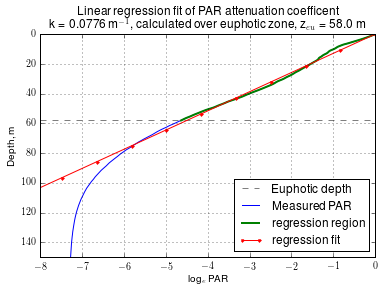

In [5]:
# Solve for k with a linear regression                                          
log_PAR = np.log(PAR)                                                           
log_PAR -= log_PAR.sel(Depth=0)                                                 
                                                                                
fig, ax = plt.subplots()                                                        
ax.plot([-8, 0], [z_eu, z_eu], 'k--', linewidth = 0.5, label='Euphotic depth')  
ax.plot(log_PAR, log_PAR.Depth, label='Measured PAR')                           
                                                                                
# Select out regression region                                                  
log_PAR = log_PAR.sel(Depth=slice(0, z_eu))                                     
ax.plot(log_PAR, log_PAR.Depth, linewidth = 2,                                  
                                     label='regression region')                 
                                                                                
x = np.array(log_PAR.Depth.values, ndmin=2).T                                   
y = np.array(log_PAR.values, ndmin=2).T                                         
m = np.squeeze(np.linalg.lstsq(x, y)[0])                                        
                                                                                
x = np.r_[0: 150: 15j]                                                          
ax.plot(m * x, x, 'r.-', label='regression fit')                                
ax.set_xlim(-8, 0)                                                              
ax.set_ylim(150, 0)                                                             
                                                                                
ax.set_xlabel(r'log$_e$ PAR')                                                   
ax.set_ylabel(r'Depth, m')                                                      
ax.set_title('Linear regression fit of PAR attenuation coefficent\n' +          
             'k = %.4f m$^{-1}$, calculated over euphotic zone, z$_{eu}$ = %.1f m'
             %(-m, z_eu))                                                       
                                                                                
plt.legend(loc=4)                                                               
plt.grid()                                                                      